In [5]:
import os

car_dir = "Car"
bike_dir = "Bike"

car_images = os.listdir(car_dir)
bike_images = os.listdir(bike_dir)

print("Car images:", len(car_images))
print("Bike images:", len(bike_images))


Car images: 2000
Bike images: 2000


In [6]:
print("First 5 Car Filenames:")
print(car_images[:5])

print("First 5 Bike Filenames:")
print(bike_images[:5])

First 5 Car Filenames:
['Car (1).jpeg', 'Car (1).jpg', 'Car (1).png', 'Car (10).jpeg', 'Car (10).jpg']
First 5 Bike Filenames:
['Bike (1).jpeg', 'Bike (1).jpg', 'Bike (1).png', 'Bike (10).jpeg', 'Bike (10).jpg']


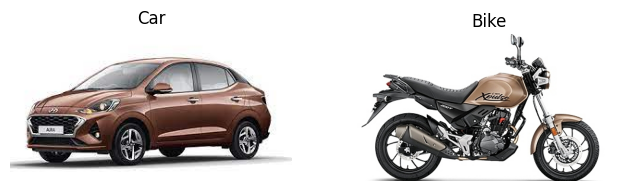

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

car_img_path = os.path.join(car_dir, car_images[7])
bike_img_path = os.path.join(bike_dir, bike_images[7])

car_img = Image.open(car_img_path)
bike_img = Image.open(bike_img_path)


plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(car_img)
plt.title("Car")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bike_img)
plt.title("Bike")
plt.axis("off")

plt.show()

In [12]:
import shutil
import random

In [ ]:
base_dir = "."          
output_dir = "data_split"

classes = ["Car", "Bike"]
splits = {
    "train": 0.7,
    "val": 0.15,
    "test": 0.15
}


Creating Output Folders

In [14]:
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)


random.seed(42)  # reproducibility

for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    images = os.listdir(cls_dir)
    
    random.shuffle(images)
    
    total = len(images)
    train_end = int(splits["train"] * total)
    val_end = train_end + int(splits["val"] * total)
    
    split_files = {
        "train": images[:train_end],
        "val": images[train_end:val_end],
        "test": images[val_end:]
    }
    
    for split, files in split_files.items():
        for img in files:
            src = os.path.join(cls_dir, img)
            dst = os.path.join(output_dir, split, cls, img)
            shutil.copy(src, dst)


In [15]:
for split in splits:
    car_count = len(os.listdir(os.path.join(output_dir, split, "Car")))
    bike_count = len(os.listdir(os.path.join(output_dir, split, "Bike")))
    
    print(f"{split.upper()} → Car: {car_count}, Bike: {bike_count}")


TRAIN → Car: 1400, Bike: 1400
VAL → Car: 300, Bike: 300
TEST → Car: 300, Bike: 300


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [17]:
train_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
)

val_test_gen = ImageDataGenerator(rescale=1./255)


In [20]:
train_data = train_gen.flow_from_directory(
    "data_split/train",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',

)

val_data = val_test_gen.flow_from_directory(
    "data_split/val",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

test_data = val_test_gen.flow_from_directory(
    "data_split/test",
    target_size =(224,224),
    batch_size =32,
    class_mode = 'binary',
    shuffle='false'
)

Found 2800 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [25]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape =(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(32,(3,3), activation ='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1, activation='sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

c:\Users\sarfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10


c:\Users\sarfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/88 ━━━━━━━━━━━━━━━━━━━━ 6:00:50 373s/step - accuracy: 0.5356 - loss: 2.0476

c:\Users\sarfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


88/88 ━━━━━━━━━━━━━━━━━━━━ 48365s 556s/step - accuracy: 0.6133 - loss: 1.2842 - val_accuracy: 0.8867 - val_loss: 0.2798
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 66s 728ms/step - accuracy: 0.8562 - loss: 0.3507 - val_accuracy: 0.9100 - val_loss: 0.2447
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 66s 690ms/step - accuracy: 0.8795 - loss: 0.2957 - val_accuracy: 0.9300 - val_loss: 0.1833
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 47s 515ms/step - accuracy: 0.9027 - loss: 0.2537 - val_accuracy: 0.9267 - val_loss: 0.1785
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 49s 527ms/step - accuracy: 0.9017 - loss: 0.2312 - val_accuracy: 0.9233 - val_loss: 0.1815
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 87s 972ms/step - accuracy: 0.9130 - loss: 0.2246 - val_accuracy: 0.9367 - val_loss: 0.1602
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9133 - loss: 0.2085 - val_accuracy: 0.9250 - val_loss: 0.1826
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9354 - loss: 0.1737 - val_accuracy: 0.9300 -

Plotting Curves

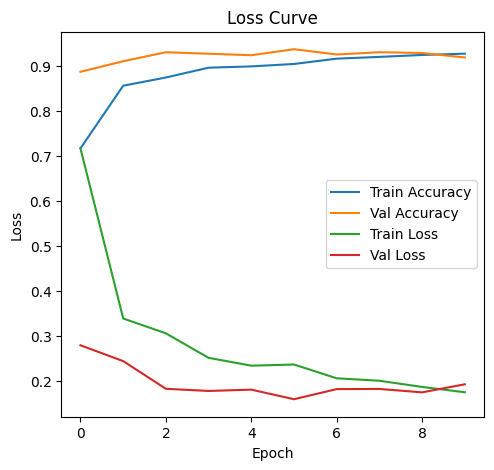

In [29]:

#Accuracy Curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label=['Train Accuracy'])
plt.plot(history.history['val_accuracy'], label=['Val Accuracy'])
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label=['Train Loss'])
plt.plot(history.history['val_loss'], label=['Val Loss'])
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



Found 600 images belonging to 2 classes.


c:\Users\sarfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\sarfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 499ms/step


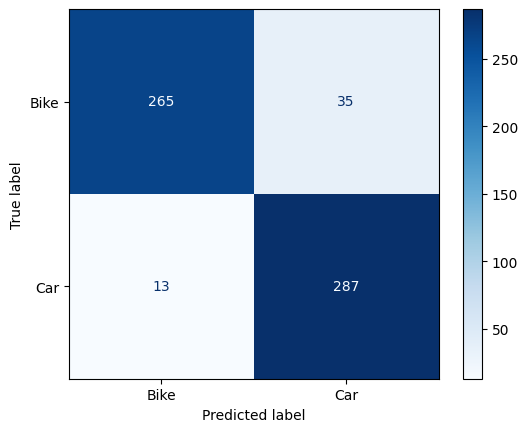

In [ ]:
test_gen = val_test_gen.flow_from_directory(
    'data_split/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False   
)

import numpy as np

# probabilities (0 → 1)
y_probs = model.predict(test_gen)

# threshold = 0.5
y_pred = (y_probs >= 0.5).astype(int)

# true labels
y_true = test_gen.classes

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=test_gen.class_indices.keys()
)

disp.plot(cmap='Blues')



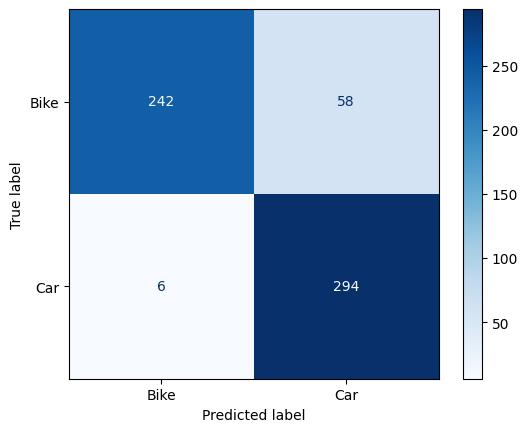

In [31]:
y_pred_03 = (y_probs >= 0.3).astype(int)
cm_03 = confusion_matrix(y_true, y_pred_03)
ConfusionMatrixDisplay(cm_03, display_labels=test_gen.class_indices.keys()).plot(cmap='Blues')


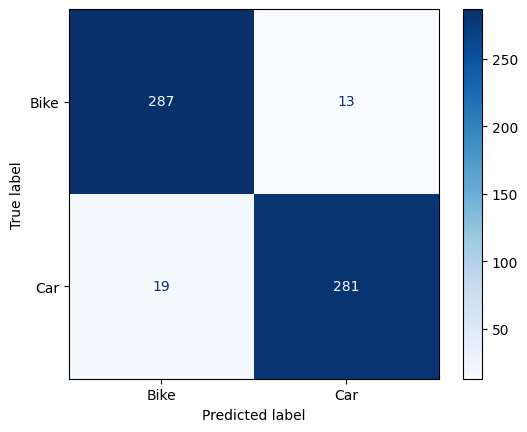

In [32]:
y_pred_07 = (y_probs >= 0.7).astype(int)
cm_07 = confusion_matrix(y_true, y_pred_07)
ConfusionMatrixDisplay(cm_07, display_labels=test_gen.class_indices.keys()).plot(cmap='Blues')
